In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

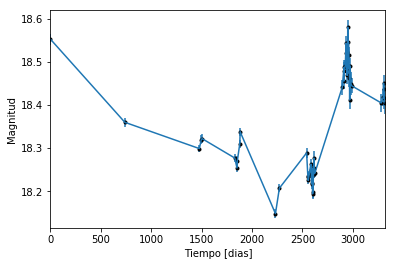

In [2]:
data = np.genfromtxt('LC_23343_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

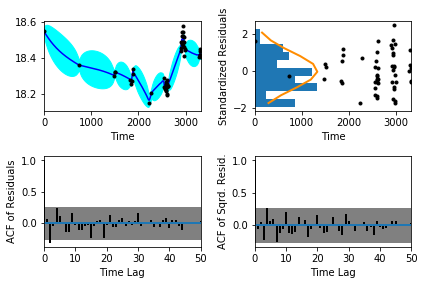

In [5]:
sample.assess_fit()

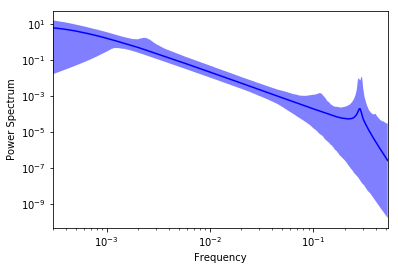

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0192733,'Medida del nivel de ruido')

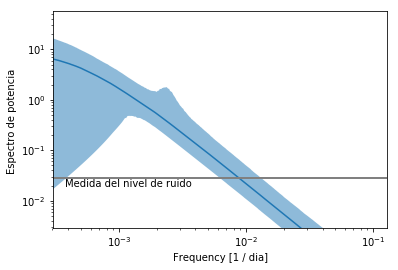

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

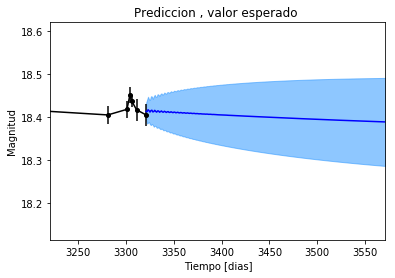

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion , valor esperado ')

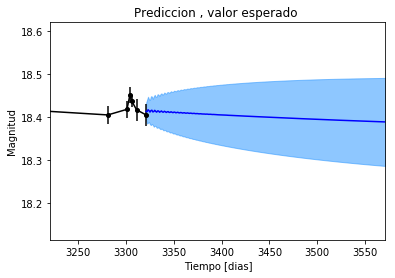

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


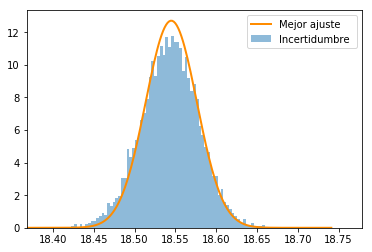

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

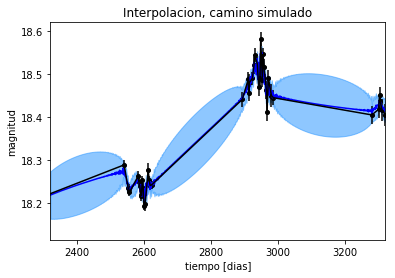

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

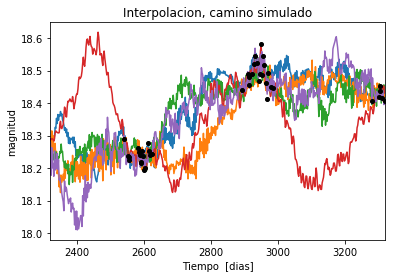

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 486.436197603
Median: 0.00753848207663
Standard deviation: 0.119505396579
68% credibility interval: [ 0.00195548  0.03791975]
95% credibility interval: [ 0.00053467  0.4143856 ]
99% credibility interval: [  3.43534241e-04   8.61731724e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 400.268755929
Median: 0.00724095602877
Standard deviation: 0.091483220116
68% credibility interval: [ 0.00177837  0.03332669]
95% credibility interval: [ 0.00048204  0.27550992]
99% credibility interval: [  3.37453673e-04   7.04701591e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 326.977707448
Median: 0.206990812685
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 180.419334534
Median: 120.670277704
Standard deviation: 2.9457682354
68% credibility interval: [ 116.92095712  123.15537072]
95% credibility interval: [ 113.78838753  124.19361932]
99% credibility interval: [ 111.40787456  124.57782357]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 421.231390602
Median: 1.64088809748
Standard deviation: 2.11465713486
68% credibility interval: [ 0.53840557  4.39049313]
95% credibility interval: [ 0.1897017   7.13657786]
99% credibility interval: [  0.07677219  11.46917564]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 319.968592131
Median: 3.51067382306
Standard deviation: 10.4669539956
68% credibility interval: [  2.91064045  19.99994734]
95% credibility interval: [  0.46927304 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19411.2055972
Median: 1.8241362868e-37
Standard deviation: 1.74677254025e+36
68% credibility interval: [  8.03359751e-86   2.07965655e-09]
95% credibility interval: [  6.74548057e-127   8.92162698e+011]
99% credibility interval: [  7.50618971e-158   2.45587384e+025]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 893.149800861
Median: 18.3679007056
Standard deviation: 0.0574926210837
68% credibility interval: [ 18.31765356  18.42309414]
95% credibility interval: [ 18.26144119  18.49893433]
99% credibility interval: [ 18.22554878  18.54644486]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 269.650812304
Median: 0.288946067824
Standard deviation: 0.219705125796
68% credibility interval: [ 0.21711733  0.70284574]
95% credibility interval: [ 0.          0.90457868]
99% credibility interval: [ 0.          1.00200215]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 269.650812304
Median: 0.288946067824
Standard deviation: 0.219705125796
68% credibility interval: [ 0.21711733  0.70284574]
95% credibility interval: [ 0.          0.90457868]
99% credibility interval: [ 0.          1.00200215]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 243.749129943
Median: 0.0
Standard deviation: 0.000399407624849
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 180.419334534
Median: 120.670277704
Standard deviation: 2.9457682354
68% credibility interval: [ 116.92095712  123.15537072]
95% credibility interval: [ 113.78838753  124.19361932]
99% credibility interval: [ 111.40787456  124.57782357]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1017.87337339
Median: 0.0142048053089
Standard deviation: 0.00705816950057
68% credibility interval: [ 0.00949027  0.02163285]
95% credibility interval: [ 0.00692993  0.03239943]
99% credibility interval: [ 0.00533286  0.04676778]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 778.462346453
Median: 1.1119743243
Standard deviation: 0.259101603439
68% credibility interval: [ 0.89374282  1.4132993 ]
95% credibility interval: [ 0.75405684  1.75346656]
99% credibility interval: [ 0.6832355   1.91742516]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 738.834439515
Median: 0.0390724399868
Standard deviation: 0.283571151899
68% credibility interval: [ 0.00867619  0.23269982]
95% credibility interval: [  2.09431924e-13   9.79663106e-01]
99% credibility interval: [  2.58277186e-27   1.79082196e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 486.436197603
Median: (-0.0473656798223-1.86907159998j)
Standard deviation: 1.5714481614
68% credibility interval: [-0.23825684-0.54503273j -0.01228665-1.82905504j]
95% credibility interval: [-2.60366149-1.0248735j  -0.00335940-1.74133232j]
99% credibility interval: [ -5.41442011e+00-0.7393404j   -2.15848929e-03-4.43927488j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 400.268755929
Median: (-0.0454962685299+1.74616984988j)
Standard deviation: 1.49533899068
68% credibility interval: [-0.20939775+5.08102474j -0.01117386+1.86857092j]
95% credibility interval: [-1.73107991+3.29981385j -0.00302872+0.0435428j ]
99% credibility interval: [ -4.42777068e+00+5.17019081j  -2.12028396e-03+2.77057064j]
Posterior summary for par